In [0]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from collections import Counter

In [0]:
all_data = pd.read_csv("all_data.csv")

In [0]:
train = all_data.iloc[:356326,:]
test = all_data.iloc[356326:,:]

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [0]:
X_test =  test.drop("SalePrice",axis = 1)
X_train = train.drop("SalePrice",axis = 1)
y_train = train["SalePrice"]

In [0]:
train_ID = X_train['id']
test_ID = X_test['id']

In [0]:
X_train.drop("id", axis = 1, inplace = True)
X_test.drop("id", axis = 1, inplace = True)

In [0]:
#平均で埋める
df.mean(numeric_only=True)

In [0]:
all_data["Breadth"] = 

In [0]:
#最頻値で埋める
statistics.mode()

In [17]:
train["FloorPlan"].unique()

array([4. , 1.5, 3. , 1. , nan, 5. , 3.5, 6. , 2. , 4.5, 2.5, 5.5, 7.5,
       9. , 7. , 6.5, 8. , 8.5])

In [16]:
train.isnull().sum()

Area                              0
Breadth                      163063
BuildingYear                  82836
CityPlanning                      0
Classification                    0
CoverageRatio                  5386
Direction                         0
DistrictName                      0
FloorAreaRatio                 5386
FloorPlan                    202552
Frontage                     176079
LandShape                         0
Municipality                      0
MunicipalityCode                  0
NearestStation                    0
Period                            0
Purpose                           0
Region                       159404
Remarks                           0
Renovation                        0
SalePrice                         0
TimeToNearestStation          10128
TotalFloorArea               236194
Type                              0
id                                0
YearBuilt                     82836
Structure_ブロック造                   0
Structure_ブロック造、軽量鉄骨造       

In [0]:
pd.set_option('display.max_rows', None)
all_data.isnull().sum()

Area                              0
Breadth                      180829
BuildingYear                  89500
CityPlanning                      0
Classification                    0
CoverageRatio                  5771
Direction                         0
DistrictName                      0
FloorAreaRatio                 5771
FloorPlan                    220745
Frontage                     195028
LandShape                         0
Municipality                      0
MunicipalityCode                  0
NearestStation                    0
Period                            0
Purpose                           0
Region                       176847
Remarks                           0
Renovation                        0
SalePrice                     34844
TimeToNearestStation          10289
TotalFloorArea               259640
Type                              0
id                                0
YearBuilt                     89500
Structure_ブロック造                   0
Structure_ブロック造、軽量鉄骨造       

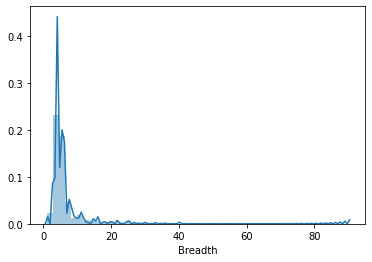

In [14]:
ax = sns.distplot(train["Breadth"])
plt.show()

Text(0, 0.5, 'SalePrice')

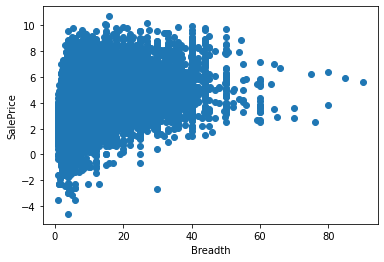

In [15]:
plt.figure
plt.scatter(train["Breadth"],train["SalePrice"])
plt.xlabel("Breadth")
plt.ylabel("SalePrice")

In [0]:
X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

In [0]:
test_x =  test.drop("SalePrice",axis = 1)
train_x = train.drop("SalePrice",axis = 1)
train_y = train["SalePrice"]

In [0]:
train_ID = train_x['id']
test_ID = test_x['id']

In [0]:
train_x.drop("id", axis = 1, inplace = True)
test_x.drop("id", axis = 1, inplace = True)

In [0]:
pd.set_option('display.max_rows', None)
all_data.isnull().sum()

Area                   0
Breadth           180829
BuildingYear       89500
CityPlanning           0
Classification         0
                   ...  
共同                     0
工場                     0
店舗                     0
秘密                     0
駐車                     0
Length: 62, dtype: int64

In [0]:
train_x, valid_x, train_y, valid_y = train_test_split(
        train_x,
        train_y,
        test_size=0.3,
        random_state=0)

In [0]:
dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(valid_x,label=valid_y)

In [0]:
num_round = 5000
evallist = [(dvalid, 'eval'), (dtrain, 'train')]

evals_result = {}

#パラメータ
param = {
            'max_depth': 3,
            'eta': 0.01,
            'objective': 'reg:squarederror',
}

#学習の実行
bst = xgb.train(
                        param, dtrain,
                        num_round,
                        evallist,
                        evals_result=evals_result,
                        # 一定ラウンド回しても改善が見込めない場合は学習を打ち切る
                        early_stopping_rounds=1000
                        )

#bst = xgb.train(param, dtrain, num_round)

#[4999]	eval-rmse:0.124586	train-rmse:0.075149
#[4999]	eval-rmse:0.118845	train-rmse:0.073414

In [0]:
len(test_x)

34844

In [0]:
dtest = xgb.DMatrix(test_x)

my_submission = pd.DataFrame()
my_submission["Id"] = test_ID
my_submission["SalePrice"] = np.exp(bst.predict(dtest))
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [0]:
my_submission.columns

Index(['Id', 'SalePrice'], dtype='object')

In [0]:
my_submission["id"] = my_submission["Id"]
my_submission["y"] = my_submission["SalePrice"]
my_submission = my_submission.drop(["SalePrice","Id"], axis=1)

In [0]:
my_submission.head()

,id,y
356326,1,24.869749
356327,2,13.993537
356328,3,241.994370
356329,4,21.289505
356330,5,62.615238


In [0]:
my_submission.to_csv('submission.csv', index=False)